<h1>Red Wine Quality Final Project</h1>

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Reading the .csv file

df = pd.read_csv('winequality-red.csv')
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [3]:
#Getting the information 
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [4]:
#Function to determine if the wine have a good or bad quality
def is_good(row):
    if row["quality"] >= 6:
        return 1
    elif row["quality"] <= 5:
        return 0

In [5]:
#Create a new column applying the function
df["is_good_quality"] = df.apply(lambda row: is_good(row), axis=1)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  is_good_quality  
0         9.4        5                0  
1         9.8        5                0  
2         9.8        5                0  
3         9.8        6                1  
4         9.4        5                0  
...       ...      ...              ...  
1594     10.5        5                0  
1595     11.2        6                1  
1596     11.0        6                1  
1597     10.2        5                0  
1598     11.0        6                1  

[1599 rows x 13 columns]

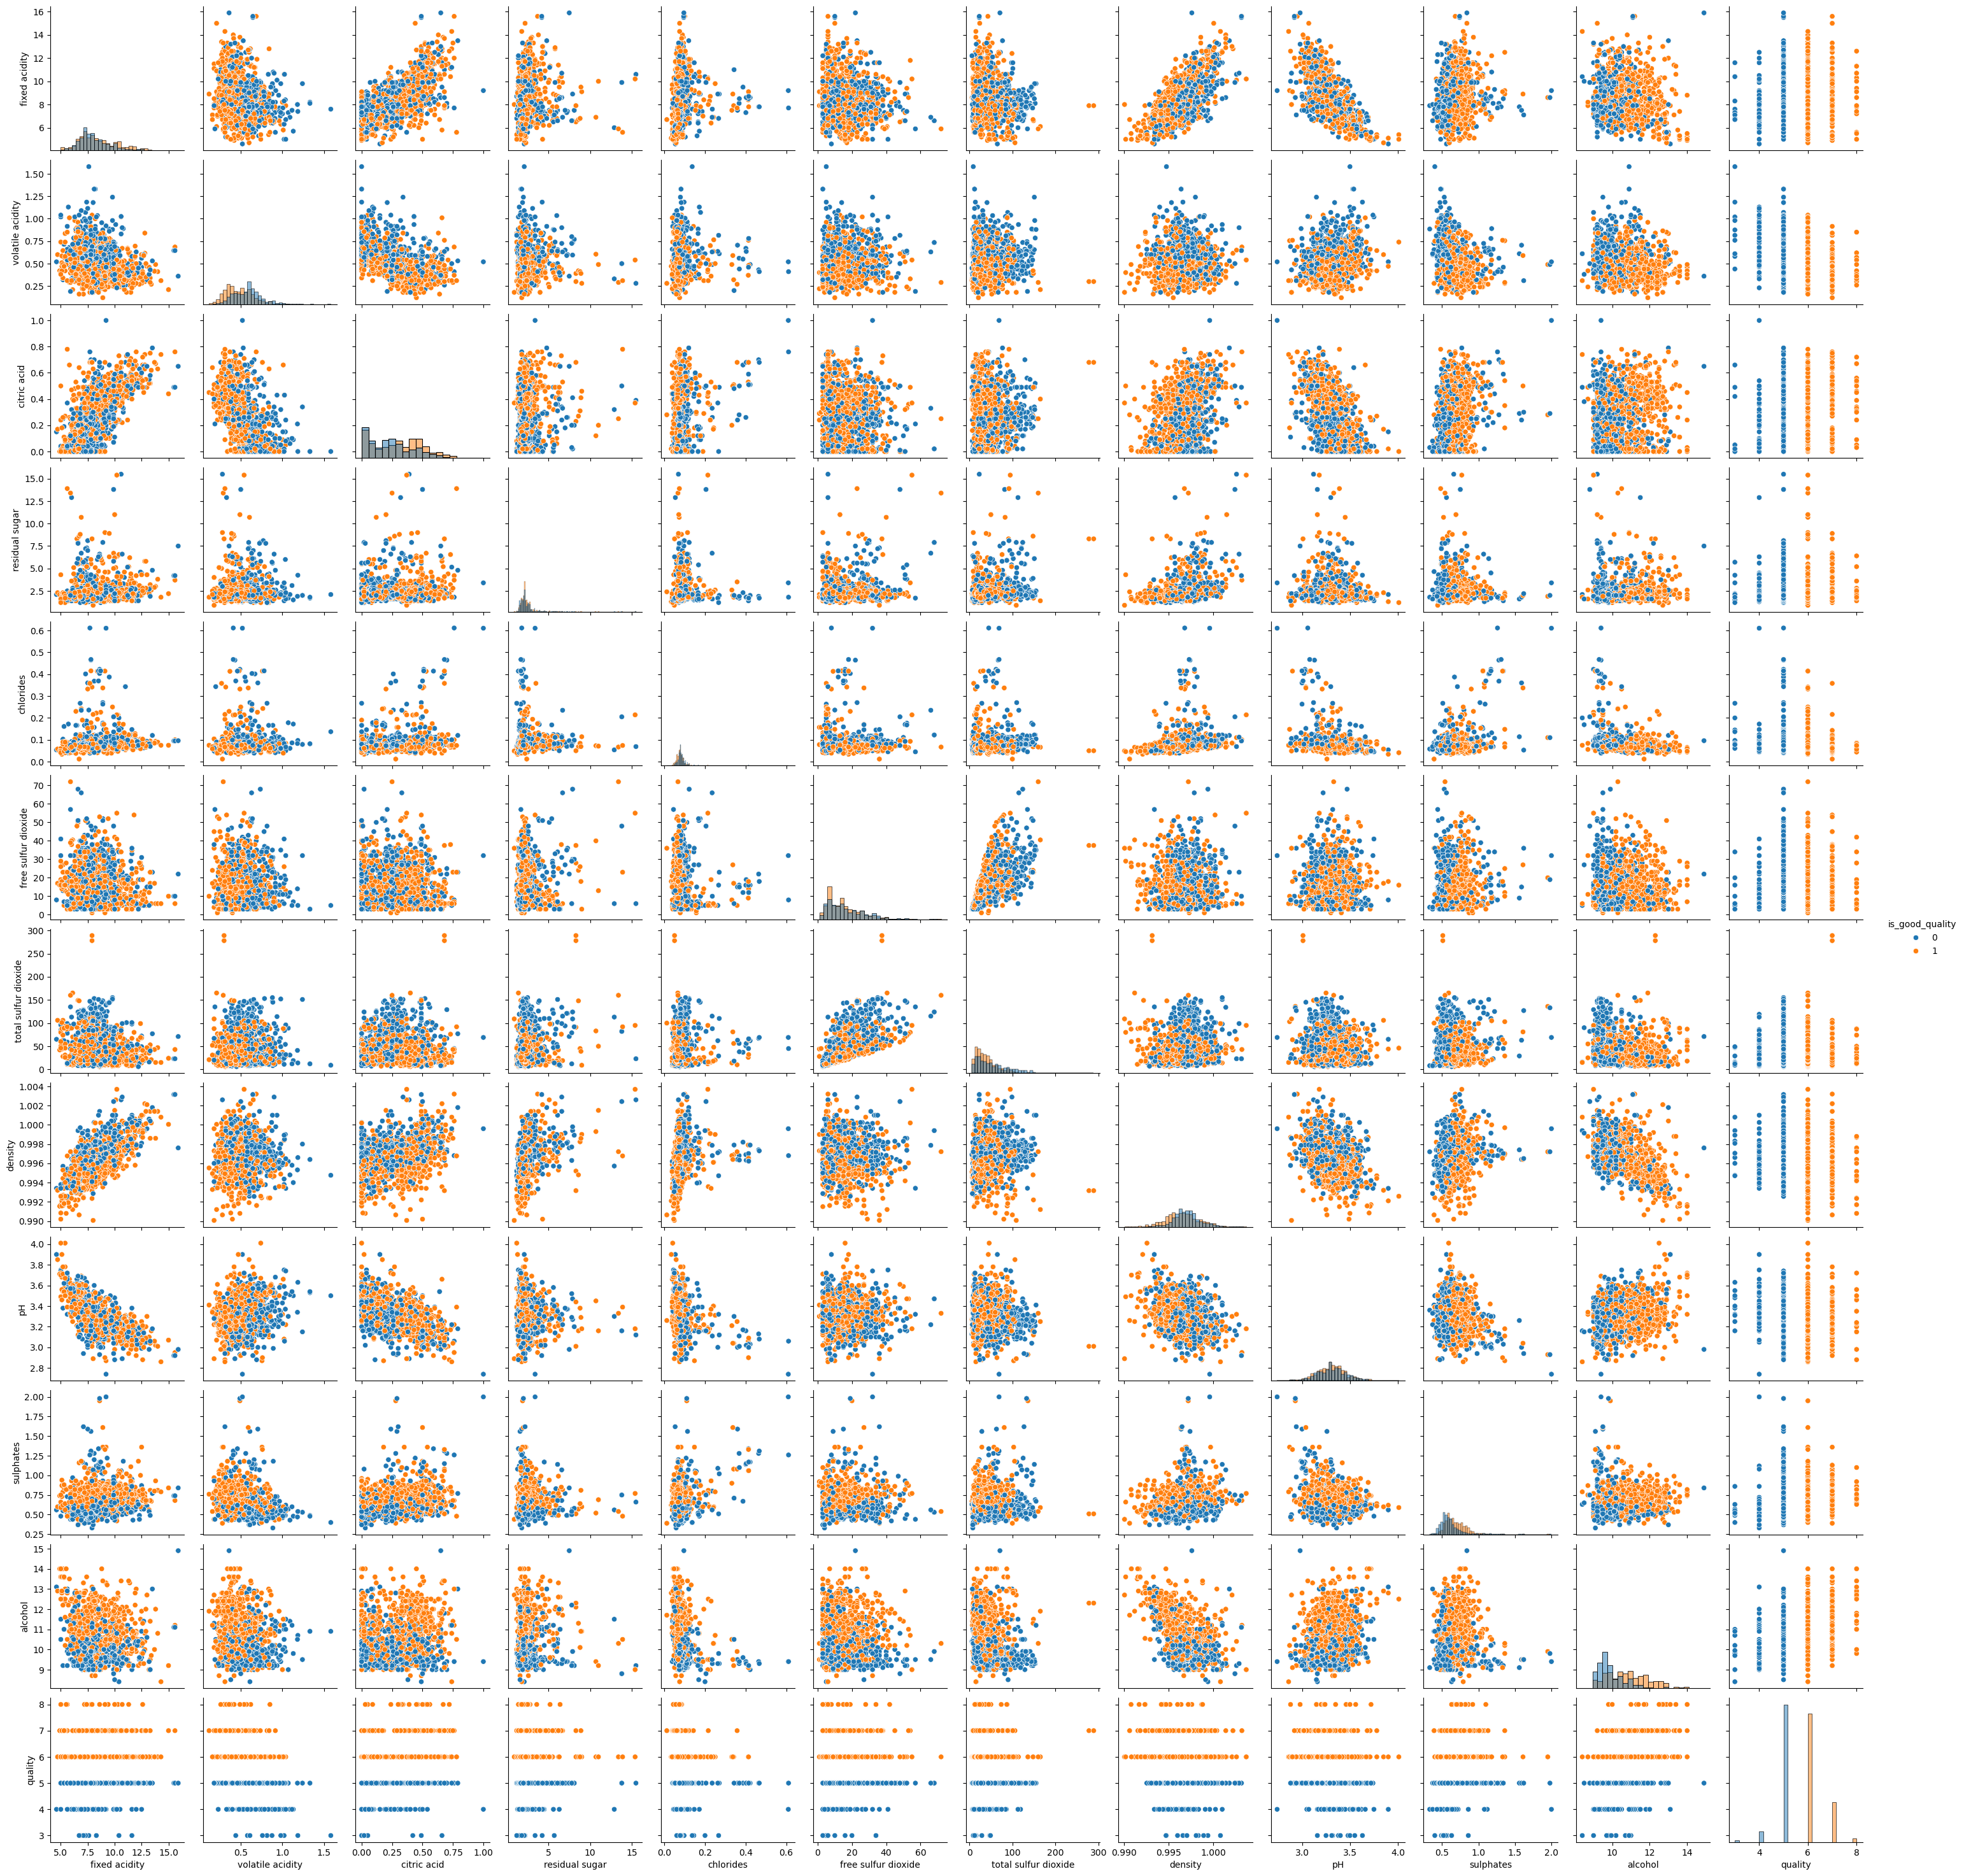

In [6]:
#Scatter plot between all the columns in the dataset using the pairplot() function in the Seaborn library.

sns.pairplot(df, hue='is_good_quality', diag_kind = 'hist')
plt.show()

In [7]:
#dropping quality column
data = df.copy()
data = data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,12]]
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  is_good_quality  
0      9.4                0  
1      9.8                0  
2      9.8                0  
3      9.8                1  
4      9.4                0

In [8]:
#Converting the 11 feature columns into standard units and appending the converted values as new columns to the dataframe 'data'

data['fixed acidity (standard units)'] = (data['fixed acidity'] - np.mean(data['fixed acidity']))/(np.std(data['fixed acidity']))
data['volatile acidity (standard units)'] = (data['volatile acidity'] - np.mean(data['volatile acidity']))/(np.std(data['volatile acidity']))
data['citric acid (standard units)'] = (data['citric acid'] - np.mean(data['citric acid']))/(np.std(data['citric acid']))
data['residual sugar (standard units)'] = (data['residual sugar'] - np.mean(data['residual sugar']))/(np.std(data['residual sugar']))
data['chlorides (standard units)'] = (data['chlorides'] - np.mean(data['chlorides']))/(np.std(data['chlorides']))
data['free sulfur dioxide (standard units)'] = (data['free sulfur dioxide'] - np.mean(data['free sulfur dioxide']))/(np.std(data['free sulfur dioxide']))
data['total sulfur dioxide (standard units)'] = (data['total sulfur dioxide'] - np.mean(data['total sulfur dioxide']))/(np.std(data['total sulfur dioxide']))
data['density (standard units)'] = (data['density'] - np.mean(data['density']))/(np.std(data['density']))
data['pH (standard units)'] = (data['pH'] - np.mean(data['pH']))/(np.std(data['pH']))
data['sulphates (standard units)'] = (data['sulphates'] - np.mean(data['sulphates']))/(np.std(data['sulphates']))
data['alcohol (standard units)'] = (data['alcohol'] - np.mean(data['alcohol']))/(np.std(data['alcohol']))
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  ...  \
0                 11.0                  34.0   0.9978  3.51       0.56  ...   
1                 25.0                  67.0   0.9968  3.20       0.68  ...   
2                 15.0                  54.0   0.9970  3.26       0.65  ...   
3                 17.0                  60.0   0.9980  3.16       0.58  ...   
4                 11.0                  34.0   0.9978  3.51       0.56  ...   

   volatile acidity (standard units)  citric acid (standard units)  \
0                           0.961877                     -1.391472   
1                           1.967442                     -1.391472   
2                           1.297065                     -1.186070   
3                          -1.384443                      1.484154   
4                           0.961877                     -1.391472   

   residual sugar (standard units)  chlorides (standard units)  \
0                        -0.453218                   -0.243707   
1                         0.043416                    0.223875   
2                        -0.169427                    0.096353   
3                        -0.453218                   -0.264960   
4                        -0.453218                   -0.243707   

   free sulfur dioxide (standard units)  \
0                             -0.466193   
1                              0.872638   
2                             -0.083669   
3                              0.107592   
4                             -0.466193   

   total sulfur dioxide (standard units)  density (standard units)  \
0                              -0.379133                  0.558274   
1                               0.624363                  0.028261   
2                               0.229047                  0.134264   
3                               0.411500                  0.664277   
4                              -0.379133                  0.558274   

   pH (standard units)  sulphates (standard units)  alcohol (standard units)  
0             1.288643                   -0.579207                 -0.960246  
1            -0.719933                    0.128950                 -0.584777  
2            -0.331177                   -0.048089                 -0.584777  
3            -0.979104                   -0.461180                 -0.584777  
4             1.288643                   -0.579207                 -0.960246  

[5 rows x 23 columns]

In [9]:
#Randomly shuffling (without replacement) all the rows in the dataframe 'data'. After shuffling, picking the first 66.66% of 
#the rows as the training set and the rest 33.33% of the rows as the test_set. 

random = data.sample(1599, replace = False)
training_set = random.iloc[0:1067, :]
test_set = random.iloc[932:, :]

print(len(training_set))
print(len(test_set))

1067
667


In [10]:
#Separating out the features and the response variable in the training set and the test set as 'x_train, y_train, x_test, and 
#y_test'

x_train = training_set.iloc[:, 12:24].values
y_train = training_set.iloc[:, 11].values
y_train = np.reshape(y_train, (len(y_train), 1))

x_test = test_set.iloc[:, 12:24].values
y_test = test_set.iloc[:, 11].values
y_test = np.reshape(y_test, (len(y_test), 1))

print("x_train_Shape:", np.shape(x_train))
print("y_train_Shape:", np.shape(y_train))

print("x_test_Shape:", np.shape(x_test))
print("y_test_Shape:", np.shape(y_test))

x_train_Shape: (1067, 11)
y_train_Shape: (1067, 1)
x_test_Shape: (667, 11)
y_test_Shape: (667, 1)


In [11]:
#Transposing and stacking a row of ones vertically to the 'x_train and x_test' for the purpose of vectorization

x_train_trans = np.transpose(x_train)
x_train_Aug = np.vstack((np.ones((1,len(x_train))),x_train_trans))
print("x_train_Aug:", np.shape(x_train_Aug))

x_test_trans = np.transpose(x_test)
x_test_Aug = np.vstack((np.ones((1,len(x_test))),x_test_trans))
print("x_test_Aug:", np.shape(x_test_Aug))

x_train_Aug: (12, 1067)
x_test_Aug: (12, 667)


In [12]:
#Defining theta as an array of zeros

theta = np.zeros((12,1))
print("theta:", np.shape(theta))

theta: (12, 1)


In [13]:
#Implementing the gradient descent algorithm

no_of_iter = np.arange(1, 30001)
alpha = 0.003
m_train = len(x_train)

m_test = len(x_test)

costfunc = []

#Iteration loop
for i in no_of_iter:
    Z = np.transpose(theta)@x_train_Aug
    p = 1/(1+np.exp(-Z))
    ft = ((np.log10(1/(1+np.exp(-Z))))@y_train)[0,0]  
    st = ((np.log10(1-(1/(1+np.exp(-Z)))))@(1-y_train))[0,0]
    cf = (1/m_train)*(-ft-st) #Cost function
    costfunc.append(cf)
    delthetaj = (1/m_train)*((x_train_Aug)@(np.transpose(p)-y_train)) #Derivative of cost function
    theta = theta - (alpha*delthetaj) #Updating theta values
    
print(len(costfunc))
print(theta)

30000
[[ 0.2124509 ]
 [ 0.27322039]
 [-0.46083392]
 [-0.10613807]
 [ 0.06932965]
 [-0.15714649]
 [ 0.42318083]
 [-0.66506062]
 [-0.24317277]
 [-0.05809685]
 [ 0.46065205]
 [ 0.94959969]]


In [14]:
#Testing the model on the training set

y_train_pred = np.zeros((m_train,1))
h_Theta = np.transpose(theta)@x_train_Aug
h_Theta_trans = np.transpose(h_Theta)


#Comparing predicted and actual results

for j in range(m_train):
    if  1/(1+np.exp(-h_Theta_trans[j])) >= 0.5: 
        y_train_pred[j] = [1]
    else: 
        y_train_pred[j] = [0]

In [15]:
#Testing the model on the test set

y_test_pred = np.zeros((m_test,1))
h_Theta = np.transpose(theta)@x_test_Aug
h_Theta_trans = np.transpose(h_Theta)


#Comparing predicted and actual results

for j in range(m_test):
    if  1/(1+np.exp(-h_Theta_trans[j])) >= 0.5: 
        y_test_pred[j] = [1]
    else: 
        y_test_pred[j] = [0]

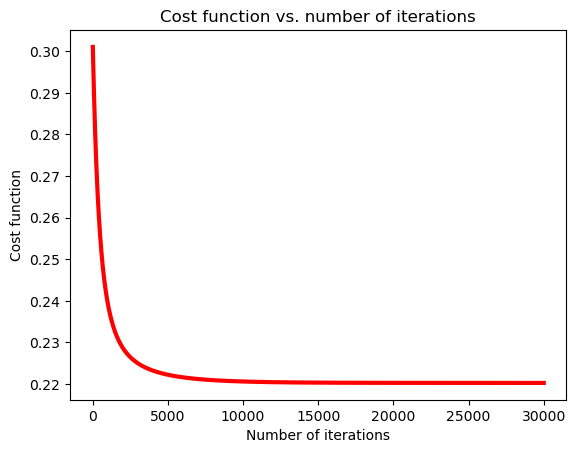

In [16]:
#Plotting cost function vs. number of iterations

plt.plot(no_of_iter,costfunc,color='r',linewidth = '3')
plt.xlabel("Number of iterations")
plt.ylabel("Cost function")
plt.title("Cost function vs. number of iterations")
plt.show()

In [17]:
#Model evaluation on the training set

#True positive

count_TP=0
for TP in range(m_train):
    if (y_train_pred[TP] == 1) & (y_train[TP] == 1): 
        count_TP = count_TP+1
print("True_Positives:",count_TP)


#False positive
count_FP=0
for FP in range(m_train):
    if (y_train_pred[FP] == 1) & (y_train[FP] == 0): 
        count_FP = count_FP+1
print("False Positives:",count_FP)


#True negative
count_TN=0
for TN in range(m_train):
    if (y_train_pred[TN] == 0) & (y_train[TN] == 0): 
        count_TN = count_TN+1
print("True Negatives:",count_TN)


#False negative
count_FN=0
for FN in range(m_train):
    if (y_train_pred[FN] == 0) & (y_train[FN] == 1): 
        count_FN = count_FN+1
print("False Negatives:",count_FN)

Accuracy = (count_TP+count_TN)/m_train
print("Accuracy:", Accuracy)

Precision =count_TP/(count_TP+count_FP)
print("Precision:", Precision)

Recall =count_TP/(count_TP+count_FN)
print("Recall:", Recall)

F1_Score = (2*Precision*Recall)/(Precision+Recall)
print("F1_Score:", F1_Score)

True_Positives: 425
False Positives: 118
True Negatives: 388
False Negatives: 136
Accuracy: 0.7619493908153702
Precision: 0.7826887661141805
Recall: 0.7575757575757576
F1_Score: 0.769927536231884


In [18]:
#Model evaluation on the test set

#True positive

count_TP=0
for TP in range(m_test):
    if (y_test_pred[TP] == 1) & (y_test[TP] == 1): 
        count_TP = count_TP+1
print("True_Positives:",count_TP)


#False positive
count_FP=0
for FP in range(m_test):
    if (y_test_pred[FP] == 1) & (y_test[FP] == 0): 
        count_FP = count_FP+1
print("False Positives:",count_FP)


#True negative
count_TN=0
for TN in range(m_test):
    if (y_test_pred[TN] == 0) & (y_test[TN] == 0): 
        count_TN = count_TN+1
print("True Negatives:",count_TN)


#False negative
count_FN=0
for FN in range(m_test):
    if (y_test_pred[FN] == 0) & (y_test[FN] == 1): 
        count_FN = count_FN+1
print("False Negatives:",count_FN)

Accuracy = (count_TP+count_TN)/m_test
print("Accuracy:", Accuracy)

Precision =count_TP/(count_TP+count_FP)
print("Precision:", Precision)

Recall =count_TP/(count_TP+count_FN)
print("Recall:", Recall)

F1_Score = (2*Precision*Recall)/(Precision+Recall)
print("F1_Score:", F1_Score)

True_Positives: 258
False Positives: 74
True Negatives: 223
False Negatives: 112
Accuracy: 0.7211394302848576
Precision: 0.7771084337349398
Recall: 0.6972972972972973
F1_Score: 0.7350427350427351


<h1>Implementation of the logistic regression algorithm using the Scikit-Learn library:</h1>

In [20]:
#Preparing the database
df= pd.read_csv('winequality-red.csv')
df["is_good_quality"] = df.apply(lambda row: is_good(row), axis=1)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  is_good_quality  
0      9.4        5                0  
1      9.8        5                0  
2      9.8        5                0  
3      9.8        6                1  
4      9.4        5                0

In [21]:
#Assigning the 11 feature columns to a variable named 'x' and assigning the response variable column to a variable named 'y'

x = df.iloc[:, 0:11]
y = df.iloc[:, 12]

print(x.head())
print(y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4  
0    0
1

In [22]:
#Feature scaling the 11 feature columns

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x.astype(float))
x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [23]:
#Splitting the dataset into training set and the test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.333333)

In [24]:
#Training the model based on 'x_train and y_train' and getting the coefficients and the intercept

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=30000, solver = 'lbfgs')
logmodel.fit(x_train,y_train)

print(logmodel.coef_)
print(logmodel.intercept_)

[[ 0.07030402 -0.64765356 -0.2697282  -0.09073031 -0.2874099   0.19106893
  -0.48316402  0.10865268 -0.22306117  0.41962131  1.0809389 ]]
[0.19337501]


In [25]:
#Testing the model on the training set

y_train_pred = logmodel.predict(x_train)

In [26]:
#Testing the model on the test set

y_test_pred = logmodel.predict(x_test)

In [27]:
#Model evaluation on the training set

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       512
           1       0.77      0.75      0.76       554

    accuracy                           0.75      1066
   macro avg       0.75      0.75      0.75      1066
weighted avg       0.75      0.75      0.75      1066

[[388 124]
 [139 415]]


In [28]:
#Model evaluation on the test set

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       232
           1       0.79      0.73      0.76       301

    accuracy                           0.74       533
   macro avg       0.73      0.74      0.73       533
weighted avg       0.74      0.74      0.74       533

[[172  60]
 [ 81 220]]


<h1>INTERFACE </h1>

In [37]:
import tkinter as tk
from tkinter import ttk, messagebox

# Function to update the model
def update_model():
    new_observation = []
    try:
        for i in range(11):
            value = float(entry_vars[i].get())
            new_observation.append(value)
    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter valid numbers for all features.")
        return

    new_observation = sc_x.transform([new_observation])
    prediction = logmodel.predict(new_observation)

    q = "Good quality 🍷" if prediction[0] == 1 else "Bad quality 🍷"
    messagebox.showinfo("Prediction", f"The model predicts: {q}")

# Create the GUI
root = tk.Tk()
root.title("Wine Quality Predictor")
root.configure(bg="#f8f9fa")

# Entry variables for user input
entry_vars = [tk.StringVar() for _ in range(11)]

# Title label
title_label = tk.Label(root, text="Wine Quality Prediction", font=("Arial", 18, "bold"), bg="#f8f9fa", fg="#6c2dc7")
title_label.grid(row=0, column=0, columnspan=2, pady=15)

# Create entry widgets for each feature
for i, feature in enumerate(df.columns[:11]):
    ttk.Label(root, text=f"{feature}:", font=("Arial", 11)).grid(row=i+1, column=0, padx=8, pady=5, sticky="e")
    entry = ttk.Entry(root, textvariable=entry_vars[i], font=("Arial", 11))
    entry.grid(row=i+1, column=1, padx=8, pady=5)

# Style for Predict button
style = ttk.Style()
style.configure("TButton",
                font=("Arial", 12, "bold"),
                foreground="black",
                background="#6c2dc7",
                padding=10)
style.map("TButton",
          background=[("active", "#4b0082")])

# Predict button
predict_button = ttk.Button(root, text="Predict Quality", command=update_model, style="TButton")
predict_button.grid(row=13, column=0, columnspan=2, pady=20)

root.mainloop()
